In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [13]:
df = pd.read_json('./data/example tree data.json')
df.set_index((i for i in range(1, 11)), inplace=True)
df

,Feature 1,Feature 2,Feature 3,Label
1,0.3,3.2,Category A,Yes
2,0.6,-5.5,Category B,No
3,0.8,7.1,Category A,Yes
4,0.1,-9.8,Category C,Yes
5,0.5,1.3,Category B,No
6,0.2,4.6,Category C,Yes
7,0.9,-2.4,Category A,No
8,0.4,8.9,Category B,No
9,0.7,-7.2,Category C,No
10,0.6,0.1,Category A,Yes


In [14]:
one_hot_data = pd.get_dummies(df.iloc[:, :-1])
one_hot_data

,Feature 1,Feature 2,Feature 3_Category A,Feature 3_Category B,Feature 3_Category C
1,0.3,3.2,True,False,False
2,0.6,-5.5,False,True,False
3,0.8,7.1,True,False,False
4,0.1,-9.8,False,False,True
5,0.5,1.3,False,True,False
6,0.2,4.6,False,False,True
7,0.9,-2.4,True,False,False
8,0.4,8.9,False,True,False
9,0.7,-7.2,False,False,True
10,0.6,0.1,True,False,False


In [15]:
 y = df.iloc[:, -1]

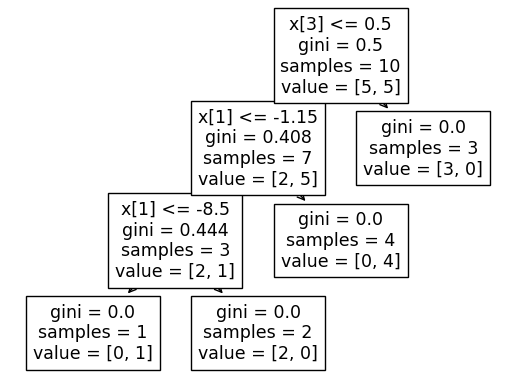

In [16]:
classifier = DecisionTreeClassifier(ccp_alpha=0)
classifier.fit(one_hot_data, y)
plot_tree(classifier)
path = classifier.cost_complexity_pruning_path(one_hot_data, y)


In [17]:
path = classifier.cost_complexity_pruning_path(one_hot_data, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas, impurities

(array([0.        , 0.13333333, 0.15238095, 0.21428571]),
 array([0.        , 0.13333333, 0.28571429, 0.5       ]))

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

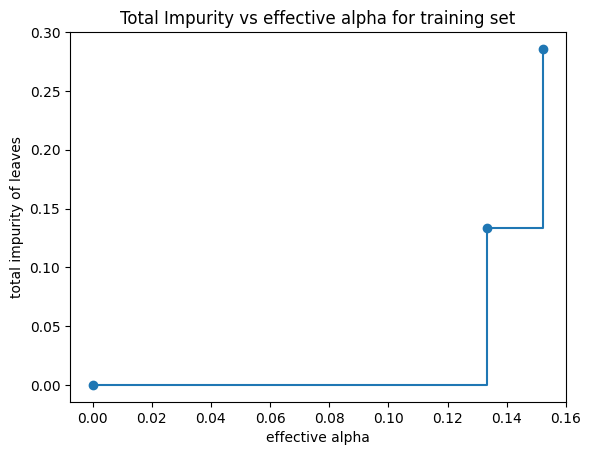

In [18]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [19]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(one_hot_data, y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2142857142857143


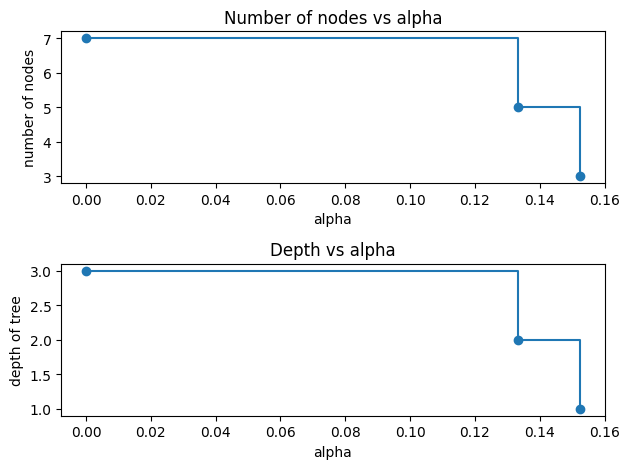

In [20]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()